#高松の気温と四国の電力消費量

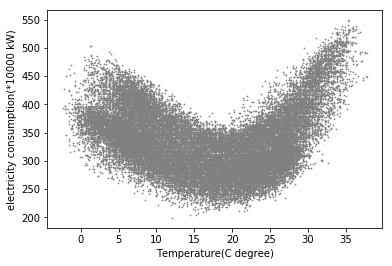

In [1]:
# coding: utf-8
import pandas as pd
import matplotlib.pyplot as plt

# 四国電力の電力消費量データを読み込み
ed = [pd.read_csv(
    'shikoku_electricity_%d.csv' % year,
    skiprows=3,
    names=['DATE', 'TIME', 'consumption'],
    parse_dates={'date_hour': ['DATE', 'TIME']},
    index_col='date_hour')
    for year in [2012, 2013, 2014, 2015, 2016]
]

elec_data = pd.concat(ed)

# 気象データを読み込み
tmp = pd.read_csv(
    u'47891_takamatsu.csv',
    parse_dates={'date_hour': ["日時"]},
    index_col="date_hour",
    na_values="×"
)

del tmp["時"]  # 「時」の列は使わないので、削除

# 列の名前に日本語が入っているとよくないので、これから使う列の名前のみ英語に変更
columns = {
    "降水量(mm)": "rain",
    "気温(℃)": "temperature",
    "日照時間(h)": "sunhour",
    "湿度(％)": "humid",
}
tmp.rename(columns=columns, inplace=True)

# 気象データと電力消費量データをいったん統合して時間軸を合わせたうえで、再度分割
takamatsu = elec_data.join(tmp["temperature"]).dropna().as_matrix()

takamatsu_elec = takamatsu[:, 0:1]
takamatsu_whhr = takamatsu[:, 1:]


# 以下グラフ生成
plt.xlabel('Temperature(C degree)')
plt.ylabel('electricity consumption(*10000 kW)')

# 以下モノクロ環境の設定
plt.scatter(takamatsu_whhr, takamatsu_elec, s=0.5,
            color="gray", label='electricity consumption(measured)')

plt.show()